# Customer LifeTime Value Prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_excel(r"C:/Users/Sayan Mondal/Desktop/CLTV/Online Retail.xlsx")

In [5]:
data.shape

(541909, 8)

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#data=data1.sample(frac=0.4,random_state=1)

In [8]:
data.shape

(541909, 8)

<AxesSubplot:>

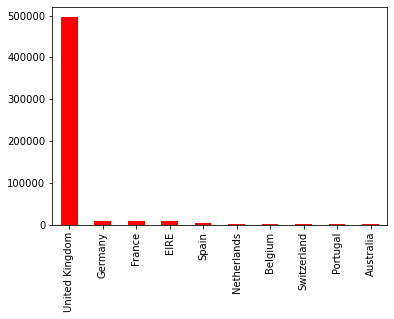

In [9]:
data.Country.value_counts()[:10].plot(kind='bar',color='r') 

In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Handling Missing Values

#There are 135080 missing values in custometID column , as our analysis on customer, 
so we will remove all missing customerID values


In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(406829, 8)

### Taking Date from DateTime

In [13]:
data['invoicedate'] = pd.to_datetime(data['InvoiceDate'], format= "%m/%d/%Y %H:%M").dt.date

In [14]:
data.drop(['InvoiceDate'], axis = 1) 

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,invoicedate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09


In [15]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoicedate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01


### Only keep the Quantity which are non negative, bcz quantity can't be negative ##

In [16]:
data= data[(data['Quantity']>0)]

In [17]:
# Now we will add a column of "Total Price = Quantity * UnitPrice"

data['TotalPrice']= data['Quantity'] * data['UnitPrice']
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoicedate,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [18]:
## keeping only necessary columns###

necess_cols= ['invoicedate','CustomerID','TotalPrice']
data= data[necess_cols]
data.head(2)

,invoicedate,CustomerID,TotalPrice
0,2010-12-01,17850.0,15.30
1,2010-12-01,17850.0,20.34


In [19]:
## now lets find the unique customers...##

len(data['CustomerID'].unique())

4339

In [20]:
## check the last order date..##
lst_order_date=data['invoicedate'].max()
print(lst_order_date)

2011-12-09


In [21]:
print(data[(data['CustomerID']==17824)])

       invoicedate  CustomerID  TotalPrice
407566  2011-10-19     17824.0       30.00
407567  2011-10-19     17824.0       30.00
407568  2011-10-19     17824.0       30.00
407569  2011-10-19     17824.0       25.00
407570  2011-10-19     17824.0       10.08
407571  2011-10-19     17824.0       10.20
407572  2011-10-19     17824.0       20.80
407573  2011-10-19     17824.0       41.76
407574  2011-10-19     17824.0       20.40
407575  2011-10-19     17824.0       30.00
407576  2011-10-19     17824.0       30.00
407577  2011-10-19     17824.0       10.08
407578  2011-10-19     17824.0       10.08


In [22]:
## Findind the recency, frequency & monetary ....###
from lifetimes.plotting import *
from lifetimes.utils import *


life_time_data = summary_data_from_transaction_data(data, 'CustomerID', 'invoicedate', monetary_value_col='TotalPrice', observation_period_end='2011-12-09')
life_time_data.head(3)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000


CustomerID 12346 made 1 purchase only (no repeat), so his frequency and recency are 0, 
and his age is 325 days (e.g. the time period between his first purchase and the end of the period in the analysis).

<AxesSubplot:ylabel='Frequency'>

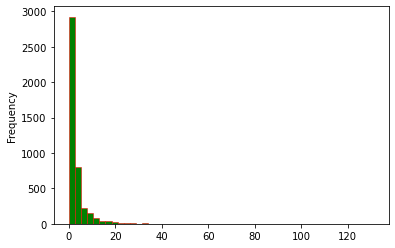

In [23]:
### Ploting histogram to understand the frequency distribution of purchase..##
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

life_time_data['frequency'].plot(kind='hist', bins=50,color= 'g', edgecolor='r',linewidth=.5)

In [24]:
life_time_data['frequency'].describe() ## To check the descriptive statistics..##

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64

In [25]:
## now lets find out the % of one time customer...##

round((sum(life_time_data['frequency']==0)/ len(life_time_data))*100, 2)

35.7

so, 35.7% of total customer purchase only one time

### Frequency and Recency analysis using the BG/NBD Model

This model is an industry standard when it comes to CLV modelling. It stands for Beta Geometric/Negative Binomal Distribution and was intrudced by Fader et al. (2005). Its basic idea is that sales of each customer can be described as a combination of his/her proability to buy and to churn. As such, it models the sales for a particular customer as a function of 2 distributions - Gamma for transactions and probability of churn as Beta. The model that we're about to fit learns 4 parameters that are able to describe these distributions. In this way, we get a unique transaction and churn probability for each customer (as we want) without having a model with hunders of parameters.

In [26]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(life_time_data['frequency'], life_time_data['recency'], life_time_data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


In [27]:
# Ranking customers from best to worst ##
t = 1
life_time_data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, life_time_data['frequency'],life_time_data['recency'], life_time_data['T'])
life_time_data.sort_values(by='predicted_purchases').tail(6)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
12971.0,70.0,369.0,372.0,159.211286,0.160632
14606.0,88.0,372.0,373.0,135.890114,0.201005
15311.0,89.0,373.0,373.0,677.729438,0.203269
17841.0,111.0,372.0,373.0,364.452162,0.253053
12748.0,113.0,373.0,373.0,298.360885,0.257581
14911.0,131.0,372.0,373.0,1093.661679,0.298312


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

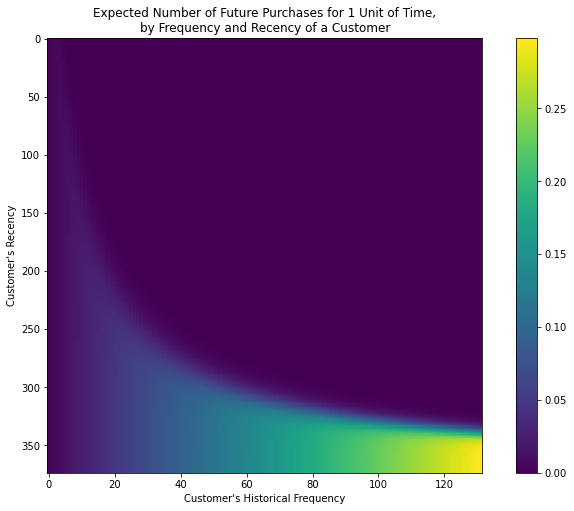

In [28]:
## Vizualize the recency frequency matrix for better understanding the segment...##
%matplotlib inline
from lifetimes.plotting import plot_frequency_recency_matrix
fig= plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

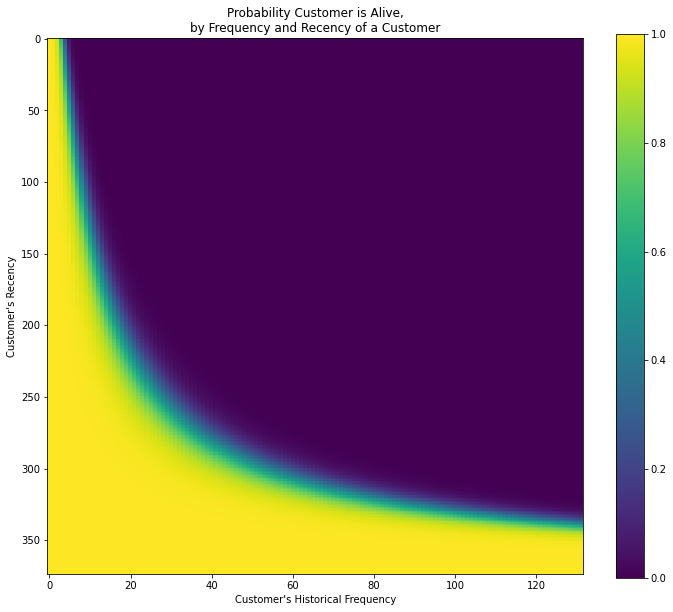

In [29]:
## Now plotting the probability of customer to be alive...##
from lifetimes.plotting import plot_probability_alive_matrix
fig= plt.figure(figsize=(12,10))
plot_probability_alive_matrix(bgf)




so from the above graph we got an idea that customer who bought 120 times and purchase 350 days back is still alive

In [30]:
## predict future transaction in next 30 days & sorting top 10 customer that model expects them to purchase##
t=30
life_time_data['pred_num_tran']= round(bgf.conditional_expected_number_of_purchases_up_to_time(t,life_time_data['frequency'],
                                life_time_data['recency'], life_time_data['T']),2)
round(life_time_data.sort_values(by='pred_num_tran', ascending=False).head(6).reset_index(),0)

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,pred_num_tran
0,14911.0,131.0,372.0,373.0,1094.0,0.0,9.0
1,12748.0,113.0,373.0,373.0,298.0,0.0,8.0
2,17841.0,111.0,372.0,373.0,364.0,0.0,8.0
3,15311.0,89.0,373.0,373.0,678.0,0.0,6.0
4,14606.0,88.0,372.0,373.0,136.0,0.0,6.0
5,12971.0,70.0,369.0,372.0,159.0,0.0,5.0


<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

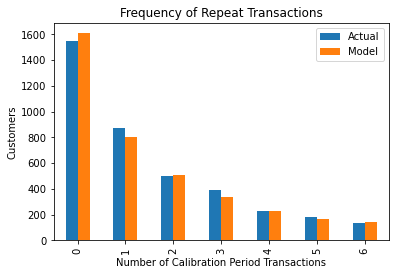

In [31]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [32]:
## Specific customers Transaction Finding ###
t=15
specific_cust= life_time_data.loc[17841]
round(bgf.predict(t,specific_cust['frequency'],specific_cust['recency'], specific_cust['T']),0)
                                

4.0

### Gamma Gamma Model for CLV Calculation

Gamma-Gamma model presented in the same paper, adds a monetary value into the mix. 
It does so by assuming that the spend of an individual is right-skewed and follows a Gamma distribution. 
One of the parameters required to describe Gamma distribution, 
also varies per customer (so each customer again ends up with different propensity to spend) and 
it also follows a Gamma distribution. 
That's why the model is called Gamma-Gamma.

In [33]:
## now lets check corelation between frequency and monetary value##
life_time_data[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.046161
monetary_value,0.046161,1.000000


In [34]:
## Finding the repeat Customer... ## Who has more than 1 purchase##
rep_customer=life_time_data[life_time_data['frequency']>0]
rep_customer.head(3)

,frequency,recency,T,monetary_value,predicted_purchases,pred_num_tran
CustomerID,,,,,,
12347.0,6.0,365.0,367.0,599.701667,0.015656,0.47
12348.0,3.0,283.0,358.0,301.480000,0.008956,0.27
12352.0,6.0,260.0,296.0,368.256667,0.018697,0.56


In [35]:
## total number of repeat customer 
len(rep_customer) 

2790

In [36]:
## Train gamma gamma moedel...##

from lifetimes import GammaGammaFitter
ggf=GammaGammaFitter(penalizer_coef=0)
ggf.fit(rep_customer['frequency'],rep_customer['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [37]:
### now lets findout estimate avg transaction per customer..##

print(ggf.conditional_expected_average_profit(rep_customer['frequency'],rep_customer['monetary_value']).head(6))

CustomerID
12347.0     569.988807
12348.0     333.762672
12352.0     376.166864
12356.0     324.008941
12358.0     539.930643
12359.0    1515.282839
dtype: float64


In [38]:
life_time_data['pred_tran_value']=round(ggf.conditional_expected_average_profit
                                  (life_time_data['frequency'],life_time_data['monetary_value']),2)

life_time_data.head(2)

,frequency,recency,T,monetary_value,predicted_purchases,pred_num_tran,pred_tran_value
CustomerID,,,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.002098,0.06,416.92
12347.0,6.0,365.0,367.0,599.701667,0.015656,0.47,569.99


In [39]:
life_time_data['CLV']=round(ggf.customer_lifetime_value(bgf,life_time_data['frequency'],
                       life_time_data['recency'], life_time_data['T'], 
                       life_time_data['monetary_value'], time=12,discount_rate=0.01),2)

df=life_time_data['CLV'].sort_values(ascending=False).reset_index() ##When we reset the index, the old index is added as a column, and a new sequential index is used#
df.head()

,CustomerID,CLV
0,14646.0,222128.93
1,18102.0,178895.33
2,16446.0,175531.47
3,17450.0,147476.62
4,14096.0,127589.20


### Converting df into CSV 

In [40]:
final_outcome=df.to_csv("C:/Users/Sayan Mondal/Desktop/CLTV/cltv.csv", index=False)

we’ve just predicted the CLV for the next 12 months for the existing customers. 
This model jointly able to perfrom the probability to churn, purchase, and the average purchase value. 
It’s simple, effective, and quite accurate when we look at the aggregated level.
There’s a multitude of applications for the newly predicted CLV - segmenting, ranking, profiling, personalising, etc. 
Knowing who your best customers are or who is about to churn is quite useful.